# Energy histograms

One of the simple things that can be done with this dataset is to track the amount of ionising energy per particle that is dumped on the detectors.

In [1]:
import numpy as np
# Set up matplotlib and use a nicer set of plot parameters
%config InlineBackend.rc = {}
import matplotlib
matplotlib.rc_file("../templates/matplotlibrc")
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import LogNorm

In [2]:
from CosObs_analysis import *

Get the paths

In [21]:
import glob

# get all paths
smpaths = glob.glob("../output/CosmicObservations/2017/07/*/SM-SIF_OBMT_START_*.fits")
smpaths.sort(key = getobmt)

bamobspaths = glob.glob("../output/CosmicObservations/2017/07/*/BAM-OBS*_OBMT_START_*.fits")
bamobspaths.sort(key = getobmt)

bamsifpaths = (glob.glob("../output/CosmicObservations/2017/07/*/BAM-SIF_OBMT_START_*.fits") +
              glob.glob("../output/CosmicObservations/2017/09/*/BAM-SIF_OBMT_START_*.fits"))
bamsifpaths.sort(key = getobmt)

Get the energies from a few BAM observations, some SM observations and all BAM-SIF (poor sampling), using July 2017 data (+September for BAM-SIF).

In [22]:
bamobs_dat = CosObs_get_energies(bamobspaths[0:2],fov=1,edgeless=True)
sm_dat = CosObs_get_energies(smpaths[:10],edgeless=True)
bamsif_dat = CosObs_get_energies(bamsifpaths,edgeless=True)

#bamobs_dat = CosObs_get_energies(psel_mjd(bamobspaths,58008,58010)[:4],fov=1,edgeless=True)
#sm_dat = CosObs_get_energies(psel_mjd(smpaths,58008,58010),edgeless=True)

We create histograms by averaging over multiple observations, which are each normalized such that the integral over the energy equals the flux.

This way, we can compare different exposure times for different chips.

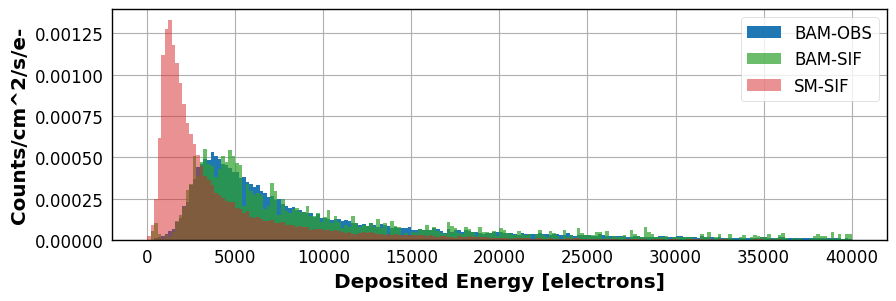

In [23]:
nhistbam_obs = energyHist_fluxnormed(bamobs_dat['EN'],bamobs_dat['FLUX'],200,(0,40000))
nhistbam_sif = energyHist_fluxnormed(bamsif_dat['EN'],bamsif_dat['FLUX'],200,(0,40000))
nhist_sm = energyHist_fluxnormed(sm_dat['EN'],sm_dat['FLUX'],200,(0,40000))

hists = [nhistbam_obs, nhistbam_sif, nhist_sm]
colors = ["tab:blue", "tab:green", "tab:red"]
labels = ['BAM-OBS', 'BAM-SIF', 'SM-SIF']
alphas = [1,0.7,0.5]

for ii in range(len(hists)):
    #if ii ==1 :continue
    h = hists[ii]
    plt.bar(h[1], h[0], h[2], color=colors[ii], alpha=alphas[ii],label=labels[ii], align='edge')

plt.xlabel("Deposited Energy [electrons]")
plt.ylabel("Counts/cm^2/s/e-")

plt.legend(loc='best')
plt.gcf().set_size_inches(10,3)
#plt.yscale('log')
#plt.savefig("../../presentation_imgs/Ehist_normal.pdf",bbox_inches='tight')

We see that

- BAM-OBS and BAM-SIF follow the same distributions, with some sampling fluctuations on BAM-SIF
- SM-SIF has systematically lower energies

The systematically lower energies in SM are due to the thinner chip, leaving less distance for the cosmic to dump energy in.

We can attempt to correct for this by increasing the SM-energies by the ratio of the chip thicknesses

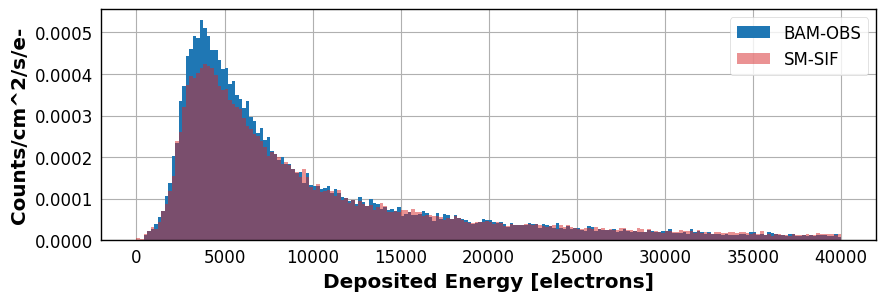

In [24]:
nhistbam_obs = energyHist_fluxnormed(bamobs_dat['EN'],bamobs_dat['FLUX'],200,(0,40000))
nhistbam_sif = energyHist_fluxnormed(bamsif_dat['EN'],bamsif_dat['FLUX'],200,(0,40000))
sm_modified = [[s*38/12 for s in o] for o in sm_dat['EN']]
nhist_sm = energyHist_fluxnormed(sm_modified,sm_dat['FLUX'],200,(0,40000))

hists = [nhistbam_obs, nhistbam_sif, nhist_sm]
colors = ["tab:blue", "tab:green", "tab:red"]
labels = ['BAM-OBS', 'BAM-SIF', 'SM-SIF']
alphas = [1,0.7,0.5]

for ii in range(len(hists)):
    if ii ==1 :continue
    h = hists[ii]
    plt.bar(h[1], h[0], h[2], color=colors[ii], alpha=alphas[ii],label=labels[ii], align='edge')

plt.xlabel("Deposited Energy [electrons]")
plt.ylabel("Counts/cm^2/s/e-")

plt.legend(loc='best')
plt.gcf().set_size_inches(10,3)
#plt.yscale('log')
#plt.savefig("../../presentation_imgs/Ehist_renormed.pdf",bbox_inches='tight')

These distributions are now very similar, although SM-SIF has a lower maximum. These low-energy cosmics may have a lower detection efficiency, due to the thin chip.